In [12]:
!pip install --upgrade .

Processing /Users/rcheung/Documents/ReinforcementLearning/Easy21
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for easy21: filename=easy21-0.1-py3-none-any.whl size=1004 sha256=c74ff5bfee518d381b110dcddb68660af374d888d9cde8d9d99cfb54e72d95d1
  Stored in directory: /private/var/folders/3w/6q32t1s12pj2t55z6kkp1drr0000gn/T/pip-ephem-wheel-cache-0zc5vs_e/wheels/bf/e1/65/2750196a72b7e303fb63a6b4ae5735ff8aca76e928650d2976
Successfully built easy21
  Attempting uninstall: easy21
    Found existing installation: easy21 0.1
    Uninstalling easy21-0.1:
      Successfully uninstalled easy21-0.1


In [13]:
from environment.easy21 import Easy21

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [14]:
game = Easy21()

$V(S_t) \leftarrow V(S_t) + \alpha (G_t - V(S_t))$

- $G_t$ is the actual return
- $V(S_t)$ is the return we expected to see


In [15]:
state = game.get_state()

In [16]:
N0 = 100
n_iterations = 500000
returns = {}
state_visit_counter = Counter()
state_action_counter = Counter()
# represent it as a 10+1 by 21+1 element matrix
# we'll have a dummy row of zeros
possible_actions = ['stick', 'hit']

for i in range(n_iterations):
    if game.terminal:
        game.setup_new_game()
    state = game.get_state()
    
    state_visit_counter[state]+=1
    epsilon = N0/(N0+state_visit_counter[state])

    if state not in returns:
        returns[state] = {'hit':0, 'stick':0}
        
    if np.random.rand() < epsilon:
        action = np.random.choice(possible_actions)
    else:
        action = max(returns[state], key=returns[state].get)
    
    reward = game.step(action)
    
    state_visit_counter[(action, state)] += 1
    
    alpha = 1.0/state_visit_counter[(action, state)]
    returns[state][action] += (alpha*(reward-returns[state][action]))
    



In [17]:
V_stick = np.zeros((22, 11))
V_hit = np.zeros((22, 11))

for key in returns:
    V_hit[key[0], key[1]] = returns[key]['hit']    
    V_stick[key[0], key[1]] = returns[key]['stick']

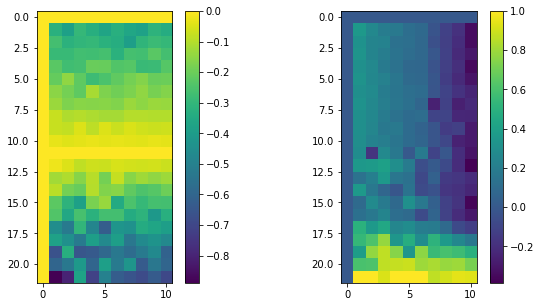

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(V_hit)
plt.colorbar()

plt.subplot(122)
plt.imshow(V_stick)
plt.colorbar()